In [48]:
from sklearn import datasets
import numpy as np

%matplotlib inline

In [71]:
# importing example datasets
digits = datasets.load_digits()

In [8]:
# data is present in data entry
digits.data

# the expected output (in this case the number representing the digit) is stored in target entry
digits.target

# viewing a single image (8*8) in digits dataset
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [27]:
# importing matplot lib for displaying the images 
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

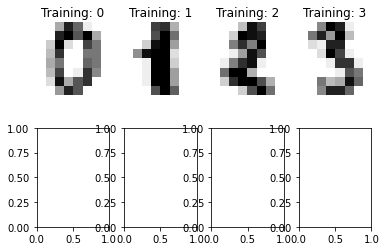

In [11]:
# example images
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [16]:
# cheecking the length of data and labels
n_samples, _ = len(digits.images), len(digits.target)
n_samples

1797

In [24]:
# converting an (8, 8) image array into (1, 64) array and staking for all examples
data = digits.images.reshape((n_samples, -1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [41]:
# splitting the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.25, shuffle = False)
len(X_train), len(X_test), len(y_train), len(y_test)

(1347, 450, 1347, 450)

In [67]:
# Creating the classifier
clf = svm.SVC(C = 0.9, gamma = 0.001)

In [68]:
# fitting the classifier to our data
clf.fit(X_train, y_train)

SVC(C=0.9, gamma=0.001)

In [69]:
# predictinng the result of our test data
predictions = clf.predict(X_test)
predictions

array([3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
       0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,
       1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 9, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3,
       4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1,
       7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1,
       7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8,
       0, 1, 2, 3, 4, 5, 6, 7, 1, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 4, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 8, 3, 7, 7, 3, 4, 6, 6, 6,
       8, 9, 1, 5, 0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 9, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,

In [70]:
# computing accuracy of our model on test data
correct_prediction_count = 0
for i in range(len(y_test)):
    if(predictions[i] == y_test[i]):
        correct_prediction_count+=1
print(f'accuracy = {correct_prediction_count/len(y_test)}')

accuracy = 0.9644444444444444


In [49]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predictions))
for ax, (image, predicted) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % predicted)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00        43
           3       0.98      0.85      0.91        47
           4       0.98      0.94      0.96        48
           5       0.94      0.98      0.96        45
           6       0.98      1.00      0.99        47
           7       0.98      1.00      0.99        45
           8       0.89      0.98      0.93        41
           9       0.96      0.96      0.96        45

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450


Confusion matrix:
[[135   0   0   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  0   0 134   0   0   0   0   0   0   0]
 [  0   0   0 136   0   0   0   0   0 

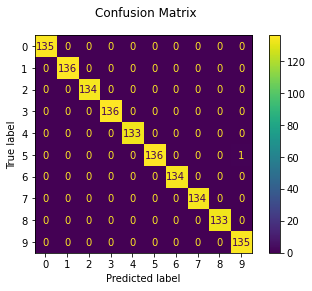

In [66]:
# printing additional metrics of our classifier
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, predictions)))
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)